# Importing required Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns                 #For Visualization
import matplotlib.pyplot as plt
import nltk                           #For NLP
import string
import re

# Loading the Datasets

In [3]:
data=pd.read_csv('Rating_Review_Amazon.csv')      #Amazon Scrapped Data
Rating_Review_Amazon=pd.DataFrame(data)
Rating_Review_Amazon

,Unnamed: 0,Rating,Review
0,0,5.0 out of 5 stars,Grab before it's Gone!
1,1,5.0 out of 5 stars,Ryzen 4500u with upgradeable internals
2,2,5.0 out of 5 stars,Best Deal on Laptop I've ever got
3,3,5.0 out of 5 stars,Best value for money thinkpad e14
4,4,5.0 out of 5 stars,"Wonderful Laptop from Thinkpad ,just Grab it w..."
...,...,...,...
15213,15213,1.0 out of 5 stars,Sim Card Slot Not Working
15214,15214,1.0 out of 5 stars,TL-MR3420 V5 and bsnl evdo compatibility
15215,15215,1.0 out of 5 stars,"Terrible Product, Do not recommend"
15216,15216,1.0 out of 5 stars,4G sim from Airtel / Jio did not get recognized


In [4]:
data1=pd.read_csv('Rating_Review_Flipkart.csv')        #Flipkart Scraped Data
Rating_Review_Flipkart=pd.DataFrame(data1)
Rating_Review_Flipkart

,Unnamed: 0,Rating,Review
0,0,4,Good quality product
1,1,4,Good choice
2,2,5,Simply awesome
3,3,4,Worth the money
4,4,5,Awesome
...,...,...,...
6536,6536,5,Must buy!
6537,6537,5,Classy product
6538,6538,5,Best in the market!
6539,6539,5,Perfect product!


# EDA Process

### Both the dataframes have a extra column named as 'Unnamed:0'. So it will be dropped from both the dataframes.

In [5]:
Rating_Review_Amazon.drop(['Unnamed: 0'],axis=1,inplace=True)
Rating_Review_Flipkart.drop(['Unnamed: 0'],axis=1,inplace=True)

### Checking Null Values

In [6]:
Rating_Review_Amazon.isnull().sum()

Rating     8
Review    16
dtype: int64

Rating_Review_Amazon has null values.

In [7]:
Rating_Review_Flipkart.isnull().sum()

Rating    0
Review    0
dtype: int64

Rating_Review_Flipkart has no null values.

### Filling the Null Values

As both the columns of Rating_Review_Amazon are object type. So the null values will be filled with mode of the feature.

In [8]:
Rating_Review_Amazon['Rating'].mode()

0    5.0 out of 5 stars
dtype: object

In [9]:
Rating_Review_Amazon['Rating'].fillna(value='5.0 out of 5 stars',inplace=True)

In [10]:
Rating_Review_Amazon['Review'].mode()

0    Good
dtype: object

In [11]:
Rating_Review_Amazon['Review'].fillna(value='Good',inplace=True)

In [12]:
Rating_Review_Amazon.isnull().sum()

Rating    0
Review    0
dtype: int64

Now There is no null values.

In [13]:
Rating_Review_Amazon['Rating'].unique()

array(['5.0 out of 5 stars', '4.0 out of 5 stars', '3.0 out of 5 stars',
       '2.0 out of 5 stars', '1.0 out of 5 stars'], dtype=object)

In [14]:
Rating_Review_Flipkart['Rating'].unique()

array([4, 5, 3, 1, 2], dtype=int64)

Here, we have to merge both the dataframes to create a large database to fed to model for rating prediction having good results.

But in Rating_Review_Amazon, the Rating values are not in the form of a single digit as in Rating_Review_Flipkart. So we have convert and merge.

In [15]:
for i in range(len(Rating_Review_Amazon)):
    Rating_Review_Amazon['Rating'][i]=Rating_Review_Amazon['Rating'][i][0]
    
Rating_Review_Amazon['Rating'].unique()

array(['5', '4', '3', '2', '1'], dtype=object)

Now we will convert the Rating values of Rating_Review_Amazon from object to integer.

In [16]:
Rating_Review_Amazon['Rating']=Rating_Review_Amazon['Rating'].astype(int)

In [17]:
Rating_Review_Amazon['Rating']=np.int64(Rating_Review_Amazon['Rating'])
Rating_Review_Amazon.dtypes

Rating     int64
Review    object
dtype: object

In [18]:
Rating_Review_Amazon['Rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [19]:
Rating_Review_Flipkart.dtypes

Rating     int64
Review    object
dtype: object

Now two dataframes are ready to be merged into one.

In [20]:
Frames=[Rating_Review_Amazon,Rating_Review_Flipkart]
Rating_Review=pd.concat(Frames,ignore_index=True)
Rating_Review

,Rating,Review
0,5,Grab before it's Gone!
1,5,Ryzen 4500u with upgradeable internals
2,5,Best Deal on Laptop I've ever got
3,5,Best value for money thinkpad e14
4,5,"Wonderful Laptop from Thinkpad ,just Grab it w..."
...,...,...
21754,5,Must buy!
21755,5,Classy product
21756,5,Best in the market!
21757,5,Perfect product!


In [21]:
Rating_Review.shape

(21759, 2)

In [22]:
Rating_Review.dtypes

Rating     int64
Review    object
dtype: object

In [23]:
Rating_Review.columns

Index(['Rating', 'Review'], dtype='object')

In [24]:
Rating_Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  21759 non-null  int64 
 1   Review  21759 non-null  object
dtypes: int64(1), object(1)
memory usage: 340.1+ KB


In [25]:
Rating_Review.describe()

,Rating
count,21759.000000
mean,3.463257
std,1.486533
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


This information shows median is higher than mean and 75th percentile and maximum value is the same. It means the Rating column is left skewed.

# Visualization

5    7757
4    4524
1    3620
3    3140
2    2718
Name: Rating, dtype: int64


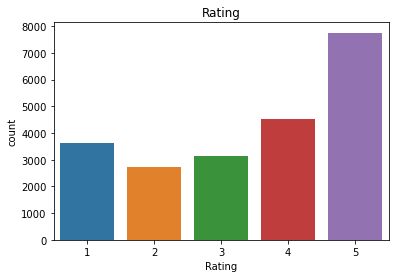

In [26]:
sns.countplot(x='Rating',data=Rating_Review)
plt.title('Rating')
print(Rating_Review['Rating'].value_counts())
plt.show()

Observation:

The Rating 5 is much higher in this dataframe. As it is left skewed.

Rating 1 to 4 is in a range of balanced dataset.

# Now we have to start preprocessing of Reviews.

First of all the review texts will cleaned to grab the important words.

Stopwords removal is not applied here as for negative reviews stopwords like not groups are mostly used.

In [27]:
from nltk.stem import WordNetLemmatizer   #Lemmatizer is used to retrieve the base word
review=[]

for i in range(len(Rating_Review)):
    rev=re.sub('[^a-z A-Z]','',Rating_Review['Review'][i])  #sorting only alphabets
    rev=rev.lower()          #Converting all texts to lowercase
    rev=rev.split()          #spliting to access each word(just like tokenization)
    wl = WordNetLemmatizer()     
    rev=[wl.lemmatize(word) for word in rev]        
    rev=' '.join(rev)
    review.append(rev)
    
review

['grab before it gone',
 'ryzen u with upgradeable internals',
 'best deal on laptop ive ever got',
 'best value for money thinkpad e',
 'wonderful laptop from thinkpad just grab it without a second thought',
 'great business laptop',
 'definitely a steal at k inr',
 'devil in disguise',
 'solid allrounder with excellent performance',
 'a beast',
 'good deal go for it',
 'perfect work laptop',
 'great build quality',
 'great performance bad display',
 'it a very good laptop',
 'sturdy sleek value for money thinkpad',
 'check for price variation',
 'great laptop overall though it ha certain flaw',
 'best laptop for k',
 'amazing laptop with a few issue',
 'good performance but bad hardware and build quality',
 'battery life is not a per company claim',
 'u review',
 'lighting fast delivery by amazon just in hr delivery after placing order',
 'good performance',
 'good look but performance not very good speed not fast',
 'billing issue',
 'price is increased by seller k is best buy can c

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

TV=TfidfVectorizer(smooth_idf=False)

In [29]:
def matrix(message, countvect):
    terms_doc = countvect.fit_transform(message)
    return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())

In [30]:
TV_review=matrix(review,TV)

In [31]:
TV_review

,aa,aacha,aad,aandhon,aata,aayi,abhi,able,abnormal,about,...,zebratronic,zebronic,zebronics,zebswrucf,zebthunder,zebwarrrior,zero,zoom,zooming,zv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning

In [32]:
x=TV_review    #Input Variable
x

,aa,aacha,aad,aandhon,aata,aayi,abhi,able,abnormal,about,...,zebratronic,zebronic,zebronics,zebswrucf,zebthunder,zebwarrrior,zero,zoom,zooming,zv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
y=pd.DataFrame(Rating_Review.iloc[:,0])   #Target Variable
y

,Rating
0,5
1,5
2,5
3,5
4,5
...,...
21754,5
21755,5
21756,5
21757,5


In [36]:
x.shape

(21759, 4678)

In [37]:
y.shape

(21759, 1)

# Multiple Algorithms

In [70]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=42)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB(), SVC(),
          RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for mc in modelclf:
    mc.fit(train_x,train_y)
    mc_y=mc.predict(test_x)
    print("Accuracy Score of",mc,"is",accuracy_score(test_y,mc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,mc_y))
    print("Classification Report\n", classification_report(test_y,mc_y))
    print("*******************************************************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.6122855392156863
Confusion Matrix
 [[ 789  144   80   44   68]
 [ 267  253  172   60   54]
 [ 159  139  368  197  103]
 [  47   57  150  734  360]
 [  79   39   62  250 1853]]
Classification Report
               precision    recall  f1-score   support

           1       0.59      0.70      0.64      1125
           2       0.40      0.31      0.35       806
           3       0.44      0.38      0.41       966
           4       0.57      0.54      0.56      1348
           5       0.76      0.81      0.79      2283

    accuracy                           0.61      6528
   macro avg       0.55      0.55      0.55      6528
weighted avg       0.60      0.61      0.60      6528

*******************************************************************



Accuracy Score of KNeighborsClassifier() is 0.5686274509803921
Confusion Matrix
 [[ 791  138   84   60   52]
 [ 315  281   81   77   52]
 [ 286  117  328  163   72]
 [ 219   73  131  687  238]
 [ 2

Here, We get the best accuracy models at SVC and RandomForestClassifier as of 65.88% and 65.65% respectively.

In [73]:
svc=SVC()
svc.fit(train_x,train_y)
svc_y=mc.predict(test_x)

# On the basis of Accuracy Score The Best Model is done by SVC having accuracy of 65.88%.

# Saving the Model

In [74]:
import pickle

filename='Rating_Review_svc.pkl'
pickle.dump(svc,open(filename,'wb'))